## City information

In [19]:
import re
import math

In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [5]:
print(type(coordination_source))

<class 'str'>


In [16]:
def get_city_info(_city_infomation):
    city_coord = {}
    for _line in _city_infomation.split('\n'):
        if _line.startswith('//') or _line == '':
            pass
        else:
            city = re.findall("name:'(\w+)'", _line)[0]
            x_y = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)]", _line)[0]
            city_coord[city] = tuple(map(float,x_y))
    return city_coord

In [43]:
city_coord = get_city_info(coordination_source)
print(city_coord)

{'兰州': (103.73, 36.03), '嘉峪关': (98.17, 39.47), '西宁': (101.74, 36.56), '成都': (104.06, 30.67), '石家庄': (114.48, 38.03), '拉萨': (102.73, 25.04), '贵阳': (106.71, 26.57), '武汉': (114.31, 30.52), '郑州': (113.65, 34.76), '济南': (117.0, 36.65), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '杭州': (120.19, 30.26), '南昌': (115.89, 28.68), '福州': (119.3, 26.08), '广州': (113.23, 23.16), '长沙': (113.0, 28.21), '沈阳': (123.38, 41.8), '长春': (125.35, 43.88), '哈尔滨': (126.63, 45.75), '太原': (112.53, 37.87), '西安': (108.95, 34.27), '北京': (116.46, 39.92), '上海': (121.48, 31.22), '重庆': (106.54, 29.59), '天津': (117.2, 39.13), '呼和浩特': (111.65, 40.82), '南宁': (108.33, 22.84), '银川': (106.27, 38.47), '乌鲁木齐': (87.68, 43.77), '香港': (114.17, 22.28), '澳门': (113.54, 22.19)}


In [26]:
def get_geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [25]:
city1_coord = city_coord['上海']
city2_coord = city_coord['北京']
lat1, lon1 = city1_coord
lat2, lon2 = city2_coord
radius = 6371  # km
    
dlat = math.radians(lat2 - lat1)
dlon = math.radians(lon2 - lon1)
a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
d = radius * c
print([dlat, dlon])
print(a)
print(c, d)

[-0.08761552845011553, 0.15184364492350672]
0.0032565059055805453
0.11419364258198242 727.52769688981


In [45]:
def get_distance_between_cities(city1, city2):
#     print(city_coord[city1])
    return get_geo_distance(city_coord[city1], city_coord[city2])

In [46]:
get_distance_between_cities('北京', '上海')

727.52769688981

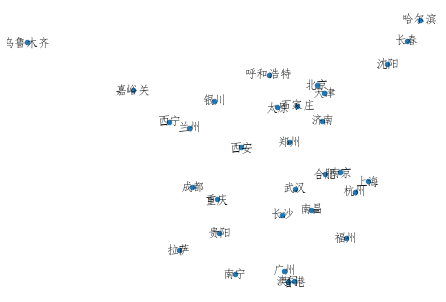

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体  
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 
    
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_coord.keys()))
nx.draw(city_graph, city_coord, with_labels = True, node_size = 20)

## Build connection between. Let's assume that two cities are connected if their distance is less than 700 km.

In [49]:
threshold = 700

from collections import defaultdict
print(defaultdict(list))
print(type(defaultdict(list)))
print(defaultdict(list)['北京'])
def build_connection_between_cities(city_info):
    city_connections = defaultdict(list)
    cities = list(city_info.keys())
    
    for city1 in cities:
        for city2 in cities:
            if city1 == city2:
                pass
            elif get_distance_between_cities(city1, city2) >= threshold:
                pass
            else:
                city_connections[city1].append(city2)
                
    return city_connections
        
city_connections = build_connection_between_cities(city_coord)
print(city_connections)

defaultdict(<class 'list'>, {})
<class 'collections.defaultdict'>
[]
defaultdict(<class 'list'>, {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'], '嘉峪关': ['兰州', '西宁', '成都', '拉萨'], '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'], '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'], '石家庄': ['武汉', '郑州', '济南', '南京', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特'], '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'], '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'], '武汉': ['石家庄', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门'], '郑州': ['石家庄', '武汉', '济南', '南京', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门'], '济南': ['石家庄', '武汉', '郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '太原', '北京', '上海', '天津', '呼和浩特'], '南京': ['石家庄', '武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '长沙', '北京', '上海', '天津'], '合肥': ['石家庄', '武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '广州', '长沙', '太原', '北京', '上海', '天津', '香港', '澳

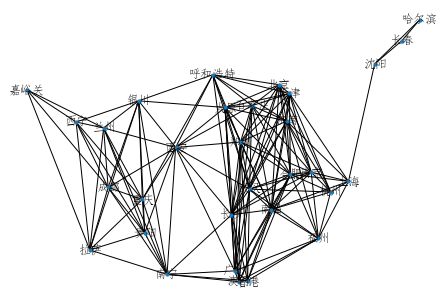

In [52]:
city_connections_graph = nx.Graph(city_connections)
nx.draw(city_connections_graph, city_coord, with_labels = True, node_size = 10)

### BFS

In [71]:
def bfs(searching_dict, origin, destination):
    pathes = [[origin]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited:
            pass
        
        successors = searching_dict[frontier]
        
        for city in successors:
            if city in path:
                pass
            else:
                new_path = path + [city]
                pathes.append(new_path)
                
            if city == destination:
                return new_path
        visited.add(frontier)
            

In [66]:
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in visited: continue
            
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:
                return new_path
        visited.add(froniter)

In [72]:
bfs(city_connections, '上海', '香港')
# search_1(city_connections, '上海', '香港')

['上海', '合肥', '香港']

In [84]:
def bfs_with_strategy(searching_dict, origin, destination, strategy):
    pathes = [[origin]]
#     visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
#         if frontier in visited:
#             pass
        
        successors = searching_dict[frontier]
        
        for city in successors:
            if city in path:
                pass
            else:
                new_path = path + [city]
                pathes.append(new_path)
        
        pathes = strategy(pathes)
                
        if pathes and pathes[0][-1] == destination:
#             return new_path
            return pathes[0]
#         visited.add(frontier)

# test_pathes = bfs_with_strategy(city_connections, '北京', '上海', strategy = lambda x:x)
# sorted(test_pathes, key = lambda x:x[1])
bfs_with_strategy(city_connections, '北京', '上海', strategy = lambda x:x)

['北京', '济南', '上海']

In [85]:
def sorted_by_distance(pathes):
    def get_path_distance(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_distance_between_cities(path[i], path[i+1])
            
        return distance
    
    return sorted(pathes, key = get_path_distance)

In [142]:
def dfs(searching_dict, origin, destination):
    pathes = [[origin]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited:
            pass
        
        successors = searching_dict[frontier]
        
        for city in successors:
            if city in path:
                pass
            else:
                new_path = [city] + path 
                pathes.append(new_path)
                
            if city == destination:
                return new_path
        visited.add(frontier)

In [87]:
bfs_with_strategy(city_connections, '北京', '广州', strategy = sorted_by_distance)

['北京', '武汉', '广州']

In [144]:
dfs(city_connections, '北京', '广州')

KeyboardInterrupt: 

## Machine Learning

In [89]:
from sklearn.datasets import load_boston
import random

In [96]:
dataset = load_boston()
# dataset.shape

In [92]:
x, y = dataset['data'], dataset['target']

In [97]:
print(x.shape)
y.shape

(506, 13)


(506,)

In [100]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [102]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [107]:
print(x[:,6].shape)
y.shape

(506, 13)


(506,)

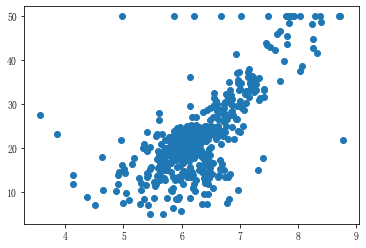

In [108]:
plt.scatter(x[:,5], y)

## Gradient decent

$$ y = k*x + b $$

### Loss fucntion
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 $$
$$ loss = \frac{1}{n} \sum{(y_i - (k*x_i + b_i))}^2 $$

In [123]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

### Define partial derivative
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n} \sum(y_i - \hat{y_i})x_i $$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n} \sum(y_i - \hat{y_i}) $$

In [130]:
def partial_derivative_for_k(x, y, y_hat):
    partial_derivative_k = 0
    
    for i in range(len(list(y))):
        partial_derivative_k += (list(y)[i] - list(y_hat)[i]) * list(x)[i]
        
    return -2 * partial_derivative_k / len(y)

def partial_derivative_for_b(y, y_hat):
    partial_derivative_b = 0
    
    for i in range(len(list(y))):
        partial_derivative_b += (list(y)[i] - list(y_hat)[i])
        
    return -2 * partial_derivative_b / len(y)

In [115]:
def linear_function(k, b, x):
    return k * x + b

In [138]:
import random

k = random.random() * 100 - 100
b = random.random() * 100 - 100

learning_rate = 1e-2
iteration_time = 1000
losses = []

X = x[:, 5]
print(type(list(X)))
print(type(list(y)))
for i in range(iteration_time):
    fitting_value = [linear_function(k, b, x) for x in X]
    
    loss_now = loss(list(y), fitting_value)
    losses.append(loss_now)
    
    print('This is the {0} time\'s iteration. The loss is {1}. The k is {2}, and b is {3}'.format(i + 1, loss_now, k, b))
    
    k = k - partial_derivative_for_k(X, y, fitting_value) * learning_rate
    b = b - partial_derivative_for_b(y, fitting_value) * learning_rate
    
best_k = k
best_b = b

<class 'list'>
<class 'list'>
This is the 1 time's iteration. The loss is 96238.46456161771. The k is -38.37370930958074, and b is -44.659967363446405
This is the 2 time's iteration. The loss is 3176.1277663996425. The k is 0.8523966762482829, and b is -38.49281722775062
This is the 3 time's iteration. The loss is 145.6793915512659. The k is 7.930827285486046, and b is -37.37944478597768
This is the 4 time's iteration. The loss is 46.996929865689566. The k is 9.20808193439407, and b is -37.17804676134618
This is the 5 time's iteration. The loss is 43.78343503004236. The k is 9.438491309268665, and b is -37.14121826696596
This is the 6 time's iteration. The loss is 43.67875718346831. The k is 9.479993306049533, and b is -37.13408711608344
This is the 7 time's iteration. The loss is 43.675313747764264. The k is 9.487406232893866, and b is -37.132315085740835
This is the 8 time's iteration. The loss is 43.67516688957835. The k is 9.488667669725562, and b is -37.13151024670421
This is the 

This is the 72 time's iteration. The loss is 43.67290129979895. The k is 9.483056972226807, and b is -37.093875903035766
This is the 73 time's iteration. The loss is 43.67286650787286. The k is 9.482965364801101, and b is -37.09329317739029
This is the 74 time's iteration. The loss is 43.67283173267777. The k is 9.48287377940444, and b is -37.092710591874166
This is the 75 time's iteration. The loss is 43.67279697420552. The k is 9.482782216031527, and b is -37.0921281464537
This is the 76 time's iteration. The loss is 43.672762232448264. The k is 9.482690674677066, and b is -37.09154584109521
This is the 77 time's iteration. The loss is 43.67272750739779. The k is 9.48259915533576, and b is -37.090963675765
This is the 78 time's iteration. The loss is 43.67269279904622. The k is 9.48250765800232, and b is -37.090381650429414
This is the 79 time's iteration. The loss is 43.67265810738536. The k is 9.48241618267145, and b is -37.08979976505477
This is the 80 time's iteration. The loss i

This is the 142 time's iteration. The loss is 43.67050583337985. The k is 9.476697363757173, and b is -37.05342168306507
This is the 143 time's iteration. The loss is 43.67047219340171. The k is 9.476607285640911, and b is -37.05284868553744
This is the 144 time's iteration. The loss is 43.67043856960059. The k is 9.476517229185939, and b is -37.052275825799825
This is the 145 time's iteration. The loss is 43.6704049619687. The k is 9.476427194387046, and b is -37.05170310381909
This is the 146 time's iteration. The loss is 43.6703713704983. The k is 9.476337181239025, and b is -37.0511305195621
This is the 147 time's iteration. The loss is 43.67033779518156. The k is 9.476247189736668, and b is -37.05055807299574
This is the 148 time's iteration. The loss is 43.670304236010764. The k is 9.476157219874771, and b is -37.049985764086905
This is the 149 time's iteration. The loss is 43.670270692978086. The k is 9.476067271648132, and b is -37.04941359280249
This is the 150 time's iteratio

This is the 210 time's iteration. The loss is 43.66825477927325. The k is 9.470621136232404, and b is -37.01477008272636
This is the 211 time's iteration. The loss is 43.668222221797066. The k is 9.470532519280331, and b is -37.01420637983655
This is the 212 time's iteration. The loss is 43.668189679977374. The k is 9.470443923638175, and b is -37.01364281250166
This is the 213 time's iteration. The loss is 43.66815715380659. The k is 9.470355349300814, and b is -37.01307938068908
This is the 214 time's iteration. The loss is 43.668124643277245. The k is 9.470266796263125, and b is -37.01251608436622
This is the 215 time's iteration. The loss is 43.66809214838173. The k is 9.470178264519985, and b is -37.0119529235005
This is the 216 time's iteration. The loss is 43.66805966911258. The k is 9.470089754066274, and b is -37.01138989805935
This is the 217 time's iteration. The loss is 43.66802720546228. The k is 9.47000126489687, and b is -37.0108270080102
This is the 218 time's iteration

This is the 278 time's iteration. The loss is 43.66607616191195. The k is 9.464643471670746, and b is -36.97674545302736
This is the 279 time's iteration. The loss is 43.66604465210394. The k is 9.4645562921812, and b is -36.97619089400633
This is the 280 time's iteration. The loss is 43.66601315744855. The k is 9.464469133655902, and b is -36.975636468341364
This is the 281 time's iteration. The loss is 43.66598167793848. The k is 9.464381996089811, and b is -36.97508217600039
This is the 282 time's iteration. The loss is 43.66595021356653. The k is 9.46429487947789, and b is -36.97452801695135
This is the 283 time's iteration. The loss is 43.665918764325355. The k is 9.464207783815096, and b is -36.9739739911622
This is the 284 time's iteration. The loss is 43.665887330207724. The k is 9.464120709096395, and b is -36.973420098600876
This is the 285 time's iteration. The loss is 43.665855911206265. The k is 9.464033655316749, and b is -36.97286633923535
This is the 286 time's iteratio

This is the 346 time's iteration. The loss is 43.66396765035159. The k is 9.458762771274644, and b is -36.93933762382819
This is the 347 time's iteration. The loss is 43.66393715449871. The k is 9.458677005930433, and b is -36.93879206035252
This is the 348 time's iteration. The loss is 43.6639066733109. The k is 9.458591261210408, and b is -36.938246628069734
This is the 349 time's iteration. The loss is 43.66387620678106. The k is 9.45850553710961, and b is -36.937701326948286
This is the 350 time's iteration. The loss is 43.66384575490221. The k is 9.458419833623081, and b is -36.93715615695663
This is the 351 time's iteration. The loss is 43.6638153176672. The k is 9.458334150745863, and b is -36.93661111806324
This is the 352 time's iteration. The loss is 43.66378489506911. The k is 9.458248488473, and b is -36.93606621023658
This is the 353 time's iteration. The loss is 43.66375448710086. The k is 9.458162846799539, and b is -36.935521433445146
This is the 354 time's iteration. T

This is the 416 time's iteration. The loss is 43.661867973796774. The k is 9.452808734194726, and b is -36.901463291328824
This is the 417 time's iteration. The loss is 43.661838487650456. The k is 9.45272440063129, and b is -36.900926835579625
This is the 418 time's iteration. The loss is 43.66180901568361. The k is 9.452640087347735, and b is -36.900390508833155
This is the 419 time's iteration. The loss is 43.66177955788938. The k is 9.452555794339188, and b is -36.89985431105839
This is the 420 time's iteration. The loss is 43.66175011426107. The k is 9.45247152160077, and b is -36.89931824222432
This is the 421 time's iteration. The loss is 43.66172068479185. The k is 9.452387269127609, and b is -36.89878230229993
This is the 422 time's iteration. The loss is 43.661691269474815. The k is 9.45230303691483, and b is -36.89824649125423
This is the 423 time's iteration. The loss is 43.66166186830316. The k is 9.452218824957562, and b is -36.89771080905622
This is the 424 time's iterat

This is the 484 time's iteration. The loss is 43.65989487766248. The k is 9.447120006003171, and b is -36.86527661997735
This is the 485 time's iteration. The loss is 43.65986634035183. The k is 9.44703704042108, and b is -36.86474886611892
This is the 486 time's iteration. The loss is 43.65983781676433. The k is 9.446954094789909, and b is -36.864221239170654
This is the 487 time's iteration. The loss is 43.65980930689352. The k is 9.446871169104861, and b is -36.86369373910203
This is the 488 time's iteration. The loss is 43.65978081073277. The k is 9.44678826336114, and b is -36.86316636588255
This is the 489 time's iteration. The loss is 43.65975232827531. The k is 9.446705377553952, and b is -36.8626391194817
This is the 490 time's iteration. The loss is 43.659723859514784. The k is 9.446622511678502, and b is -36.86211199986898
This is the 491 time's iteration. The loss is 43.65969540444449. The k is 9.446539665729997, and b is -36.86158500701391
This is the 492 time's iteration.

This is the 554 time's iteration. The loss is 43.65793004912107. The k is 9.441360335163187, and b is -36.82863867406731
This is the 555 time's iteration. The loss is 43.65790245667035. The k is 9.44127875462218, and b is -36.82811973061866
This is the 556 time's iteration. The loss is 43.65787487748845. The k is 9.441197193699029, and b is -36.82760091196152
This is the 557 time's iteration. The loss is 43.657847311568965. The k is 9.44111565238902, and b is -36.827082218065875
This is the 558 time's iteration. The loss is 43.65781975890561. The k is 9.44103413068743, and b is -36.826563648901725
This is the 559 time's iteration. The loss is 43.65779221949198. The k is 9.440952628589551, and b is -36.826045204439076
This is the 560 time's iteration. The loss is 43.65776469332166. The k is 9.440871146090666, and b is -36.82552688464794
This is the 561 time's iteration. The loss is 43.65773718038831. The k is 9.440789683186061, and b is -36.82500868949834
This is the 562 time's iteratio

This is the 622 time's iteration. The loss is 43.65608367159664. The k is 9.43585731234997, and b is -36.79363329654247
This is the 623 time's iteration. The loss is 43.6560569670442. The k is 9.435777055133315, and b is -36.79312277091619
This is the 624 time's iteration. The loss is 43.65603027533371. The k is 9.435696817216295, and b is -36.79261236805717
This is the 625 time's iteration. The loss is 43.656003596458945. The k is 9.435616598594267, and b is -36.79210208793588
This is the 626 time's iteration. The loss is 43.655976930413644. The k is 9.435536399262592, and b is -36.791591930522806
This is the 627 time's iteration. The loss is 43.65595027719171. The k is 9.435456219216633, and b is -36.79108189578844
This is the 628 time's iteration. The loss is 43.65592363678694. The k is 9.435376058451752, and b is -36.79057198370327
This is the 629 time's iteration. The loss is 43.655897009193154. The k is 9.435295916963309, and b is -36.79006219423783
This is the 630 time's iterati

This is the 693 time's iteration. The loss is 43.654219210319056. The k is 9.430206745382293, and b is -36.757689373239465
This is the 694 time's iteration. The loss is 43.6541934023613. The k is 9.430127846970265, and b is -36.757187491129784
This is the 695 time's iteration. The loss is 43.65416760681433. The k is 9.430048967531118, and b is -36.756685729708835
This is the 696 time's iteration. The loss is 43.65414182367202. The k is 9.429970107060289, and b is -36.75618408894759
This is the 697 time's iteration. The loss is 43.65411605292848. The k is 9.429891265553216, and b is -36.755682568817036
This is the 698 time's iteration. The loss is 43.65409029457782. The k is 9.429812443005337, and b is -36.75518116928816
This is the 699 time's iteration. The loss is 43.654064548613945. The k is 9.429733639412095, and b is -36.754679890331964
This is the 700 time's iteration. The loss is 43.65403881503098. The k is 9.429654854768932, and b is -36.75417873191945
This is the 701 time's ite

This is the 761 time's iteration. The loss is 43.65249224400042. The k is 9.42488464582345, and b is -36.72383486988641
This is the 762 time's iteration. The loss is 43.65246726651782. The k is 9.424807027228752, and b is -36.72334112884579
This is the 763 time's iteration. The loss is 43.65244230104654. The k is 9.424729427299173, and b is -36.72284750653619
This is the 764 time's iteration. The loss is 43.65241734758089. The k is 9.424651846030224, and b is -36.722354002929066
This is the 765 time's iteration. The loss is 43.65239240611501. The k is 9.424574283417419, and b is -36.72186061799587
This is the 766 time's iteration. The loss is 43.65236747664312. The k is 9.42449673945627, and b is -36.72136735170807
This is the 767 time's iteration. The loss is 43.65234255915952. The k is 9.424419214142294, and b is -36.72087420403712
This is the 768 time's iteration. The loss is 43.65231765365833. The k is 9.424341707471005, and b is -36.72038117495452
This is the 769 time's iteration.

This is the 831 time's iteration. The loss is 43.65077251395087. The k is 9.41949617574643, and b is -36.689558175834854
This is the 832 time's iteration. The loss is 43.65074836346354. The k is 9.419419852929328, and b is -36.68907267738844
This is the 833 time's iteration. The loss is 43.650724224589965. The k is 9.419343548465747, and b is -36.68858729569093
This is the 834 time's iteration. The loss is 43.65070009732435. The k is 9.419267262351273, and b is -36.688102030714255
This is the 835 time's iteration. The loss is 43.650675981661244. The k is 9.419190994581491, and b is -36.68761688243035
This is the 836 time's iteration. The loss is 43.650651877595074. The k is 9.419114745151996, and b is -36.68713185081115
This is the 837 time's iteration. The loss is 43.65062778512018. The k is 9.419038514058371, and b is -36.6866469358286
This is the 838 time's iteration. The loss is 43.65060370423111. The k is 9.41896230129621, and b is -36.68616213745465
This is the 839 time's iterati

This is the 899 time's iteration. The loss is 43.64915645898987. The k is 9.414347813177454, and b is -36.656808833976974
This is the 900 time's iteration. The loss is 43.64913308564192. The k is 9.414272728398752, and b is -36.65633121083892
This is the 901 time's iteration. The loss is 43.64910972353389. The k is 9.414197661675857, and b is -36.65585370255599
This is the 902 time's iteration. The loss is 43.64908637266042. The k is 9.414122613004427, and b is -36.65537630910055
This is the 903 time's iteration. The loss is 43.649063033016056. The k is 9.41404758238012, and b is -36.654899030444994
This is the 904 time's iteration. The loss is 43.649039704595424. The k is 9.413972569798597, and b is -36.65442186656172
This is the 905 time's iteration. The loss is 43.649016387393104. The k is 9.41389757525552, and b is -36.653944817423124
This is the 906 time's iteration. The loss is 43.64899308140372. The k is 9.41382259874655, and b is -36.65346788300162
This is the 907 time's iterat

This is the 969 time's iteration. The loss is 43.647547175561364. The k is 9.409135246719071, and b is -36.62365108360191
This is the 970 time's iteration. The loss is 43.647524576096394. The k is 9.409061415418025, and b is -36.62318143398314
This is the 971 time's iteration. The loss is 43.64750198749923. The k is 9.408987601871358, and b is -36.62271189730208
This is the 972 time's iteration. The loss is 43.64747940976461. The k is 9.408913806074802, and b is -36.62224247353157
This is the 973 time's iteration. The loss is 43.64745684288737. The k is 9.408840028024088, and b is -36.62177316264446
This is the 974 time's iteration. The loss is 43.6474342868622. The k is 9.40876626771495, and b is -36.621303964613595
This is the 975 time's iteration. The loss is 43.64741174168392. The k is 9.40869252514312, and b is -36.620834879411845
This is the 976 time's iteration. The loss is 43.64738920734734. The k is 9.408618800304332, and b is -36.62036590701208
This is the 977 time's iteratio

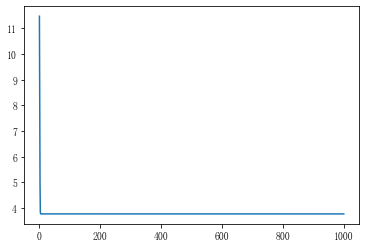

In [139]:
import numpy as np
plt.plot(list(range(iteration_time)), np.log(losses))

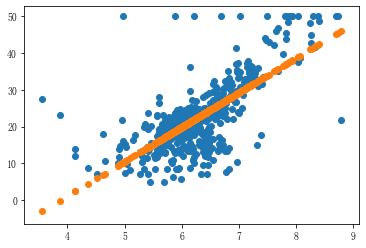

In [140]:
final_y_hat = [linear_function(best_k, best_b, x) for x in X]
plt.scatter(X, y)
plt.scatter(X, final_y_hat)